We've introduced the harmonic oscillator and rigid rotator as simplified models to describe the vibrational and rotational movements of diatomic molecules -- here we will look at the idealized spectra of diatomic molecules in light of the selection rules imposed by these model systems.

# The Rigid Rotator & Selection Rules

The rotational energy levels of a rigid rotator are:

$$E_J = \frac{\hbar^2}{2I}J(J+1) \qquad J = 0,1,2...$$

$I$ refers to the moment of inertia, which is a function of bond length and the reduced mass for any diatomic. Note that this equation leads to unequal spacing of energy levels (a property unlike that of the vibrational energy levels for the Harmonic oscillator).

The transitions between the various rotational energy levels are restricted by a selection rule which states $\Delta J = \pm1$. We can determine this selection rule (others) by computing the expectation value of the transition dipole moment:

$$\langle \nu'|\mu_z|\nu\rangle = \int_{-\infty}^{\infty}dx \psi_{\nu'}(x)\mu_z(x)\psi_nu(x)$$

$$ = \int_0^{2\pi}\int_0^{\pi}Y_{J'}^{m'}(\theta,\phi)^*\mu_zY_{J}^{m}(\theta,\phi)sin\theta d\theta d\phi$$

Recall that the Jacobian needed to transition from cartesian coordinates to spherical coordinates is $r^2sin\theta$.  Substituting $\mu_z = \mu_0\cos\theta$ into the above integral yields:

$$\langle J',m'|\mu_z|J,m\rangle = \mu_0\int_0^{2\pi}\int_0^{\pi}Y_{J'}^{m'}(\theta,\phi)^*Y_{J}^{m}(\theta,\phi)\cos\theta\sin\theta d\theta d\phi$$

This integral will only be nonzero if $\mu_0\neq 0 $, which means that the molecule must have a permanent dipole moment in order to have a rotational spectrum.  

Next, plug in the separated $\phi$ and $\theta$ form of the spherical harmonic and change variables $\left(x=\cos\theta\right)$:

$$Y_l^m(\theta,\phi) = i^{m+|m|}N_{Jm}P_J^{|m|}(\cos\theta)e^{im\phi}$$

$$\langle J',m'|\mu_z|J,m\rangle = \mu_0N_{J,m}N_{J',m'}\int_0^{2\pi}d\phi e^{i(m-m')\phi}\int_{-1}^{1}dx \quad x P_{J'}^{|m'|}(x)P_J^{|m|}(x)$$

The integral over $\phi$ equals zero unless $m'=m$, which implies $\Delta m = 0$ (our first selection rule). By employing the recursion relationship of Legendre polynomials, we can evaluate $xP_j^{|m|}$ and determine the other rigid rotor selection rule: $\Delta J = \pm 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

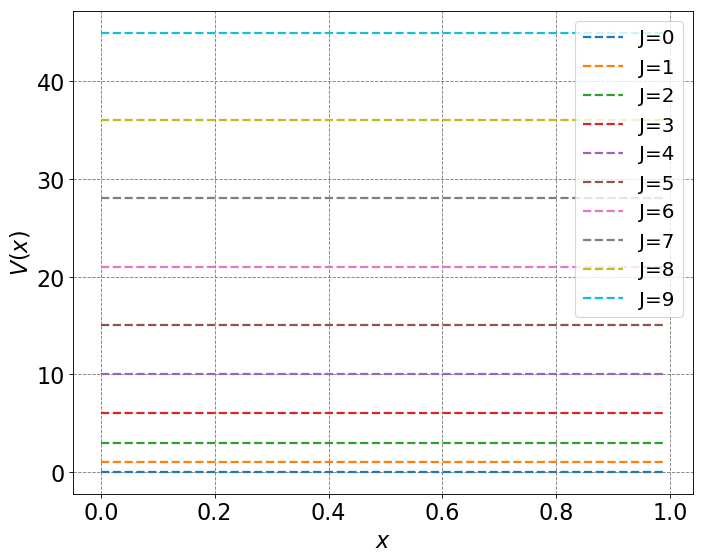

In [4]:
# plot rotational energy levels
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
I = 1
x = np.arange(0,1,0.01)
for j in range(10):
    # compute and plot energy levels
    energy = hbar**2/(2*I)*j*(j+1)
    label = "J=" + str(j)
    ax.plot(x, energy * np.ones(np.shape(x)),'--',lw=2,label=label)
plt.legend(fontsize=18)

# The Harmonic Oscillator & Selection Rules

The vibrational energy levels of the Harmonic oscillator are:

$$ E_{n} = \left(n +\frac{1}{2}\right)h\tilde{\nu} \qquad n = 0,1,2...$$

in which

$$ \tilde{\nu} = \frac{1}{2\pi c}\left(\frac{k}{\mu}\right)^{1/2} $$

Transitions between vibrational energy levels are governed by the selection rule, $\Delta n = \pm1$, which can be derived in the same way that it was done for the rigid rotator above.


# Coupling of a Harmonic Oscillator and Rigid Rotor

If the vibrational motion of a diatomic molecule is well described by the harmonic oscillator model and the rotational motion is well described by a rigid rotator, the vibrational-rotational spectrum should be well described by the combination of these two. That is, you'd expect the total rotational and vibrational enegy of the molecule to be the sum of the rotational and vibrational energies given above.

$$E_{n,J} = \left(n+\frac{1}{2}\right)h\tilde{\nu}+\tilde{B}J(J+1) \qquad n = 0,1,2... \qquad J = 0,1,2...$$

in which 

$$\tilde{B} = \frac{h}{8\pi^2cI}$$

Additionally, when a molecule that is described by this both models absorbs a photon, both selection rules apply:

$\Delta \nu = \pm 1$

$\Delta J = \pm 1$.

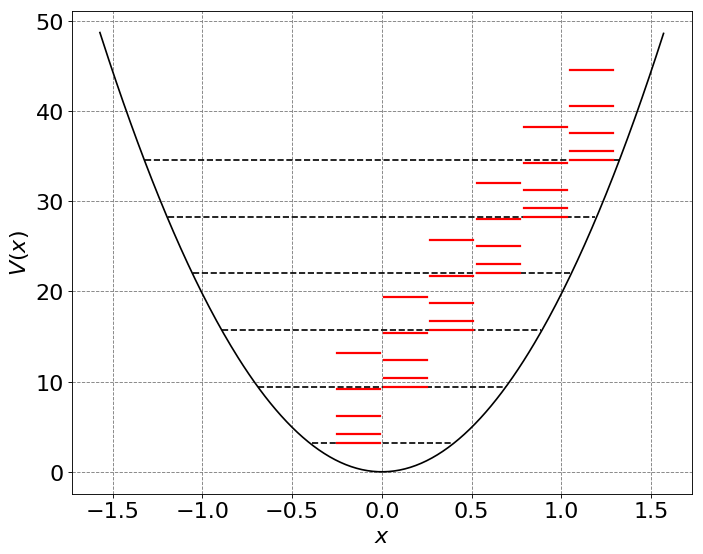

In [27]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial

# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
xrot = np.arange(-0.25,0,0.01)
for n in range(6):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    for j in range(5):
        # compute and plot energy levels
        energy = hbar**2/(2*mu)*j*(j+1) + evals
        ax.plot(xrot, energy * np.ones(np.shape(xrot)), 'r-',lw=2)
    xrot += 0.26
plt.legend(fontsize=18)

The above energy equation (and the associated Hamiltonian) assumes that the vibrational and rotational states are independent, although this isn't completely accurate. When a molecule absorbs infrared radiation, this causes a transition between vibrational levels, but that transition is also accompanied by a transition between rotational levels. Similarly, when a molecule absorbs high energy visible or ultraviolet light, a transition between electronic states is also accompanied by transitions between rotational and vibrational energy levels. 

In order to account for coupling between the rotational and vibrational levels, the Hamiltonian must be rewritten and a new Schrodinger equation solved. A simple approximation is to recognize that the bond length likely increases as vibrational quantum number increases, and therefore $\tilde{B}$ should really depend on the vibrational state of the molecule. We can rewrite the sum of the vibrational and rotational energies as:

$$E_{n,J} = \left(n+\frac{1}{2}\right)\tilde{\nu}  +  \tilde{B_n} J(J+1)$$

in which the notation, $B_n$, indicates that the rotational constant depends on the vibrational energy level $n$.  This dependence is called the rotation-vibration interaction, and it's expressed as:

$$ \tilde{B_n} = \tilde{B_e} - \tilde{\alpha_e}\left(n+\frac{1}{2}\right) $$

If we consider the $n=0\rightarrow1$ transition (for which $\Delta J = +1$), then the so called R branch of the rotational vibrational spectra is comprised of observable peaks dictated by:

$$\tilde{\nu_R}\left(\Delta J =+1\right) = E_{1,J+1} - E_{0,J}$$

$$ = \frac{3}{2}\tilde{\nu} + \tilde{B_1}\left(J+1\right)\left(J+2\right) - \frac{1}{2}\tilde{\nu} - \tilde{B_0} J\left(J+1\right)$$

$$ = \tilde{\nu} + 2\tilde{B_1}+\left(3\tilde{B_1}-\tilde{B_0}\right)J + \left(\tilde{B_1}-\tilde{B_0}\right)J^2 \quad J=0,1,2,...$$

Likewise, the P branch is given by: 

$$\tilde{\nu_P}\left(\Delta J = - 1\right) = E_{1,J-1} - E_{0,J}$$

$$ = \tilde{\nu} - \left(\tilde{B_1}+\tilde{B_0}\right)J + \left(\tilde{B_1}-\tilde{B_0}\right)J^2 \quad J=1,2,3,...$$

Additionally, not only do we need to correct the energy contribution of vibrational transitions due to a dependence on bond length, but we also need to correct the energy equation for rotational transitions, as diatomics do not have truly rigid bonds. In fact, as molecules rotate more energetically, the centrifugal force causes the bond to stretch. This can be observed in the uneven line spacing seen in the rotation-vibration spectra of diatomic molecules. From perturbation theory, we get the following correction factor:

$$ \tilde{\nu} = F\left(J+1\right)-F\left(J\right) $$

$$ = 2\tilde{B}\left(J+1\right)-4\tilde{D}\left(J+1\right)^3 \qquad J = 0,1,2...$$

in which $\tilde{D}$ is the centrifugal distortion constant.

## Vibrational and Rotational Spectra of the Hydrogen Halides

reduced mass of HBr (amu): 0.9952473087979751
reduced mass of HBr (Kg): 1.652647010713973e-27
2650.684176458127
8.466832909235166
2667.617842276597
[2870.821832098241, 2853.8881662797708, 2836.9545004613005, 2820.02083464283, 2803.0871688243597, 2786.1535030058894, 2769.219837187419, 2752.286171368949, 2735.3525055504783, 2718.418839732008, 2701.485173913538, 2684.551508095067, 2667.617842276597]
2633.7505106396566
[2633.7505106396566, 2616.8168448211864, 2599.8831790027157, 2582.9495131842455, 2566.0158473657752, 2549.0821815473046, 2532.1485157288344, 2515.214849910364, 2498.281184091894, 2481.3475182734237, 2464.413852454953]


(2400, 2900)

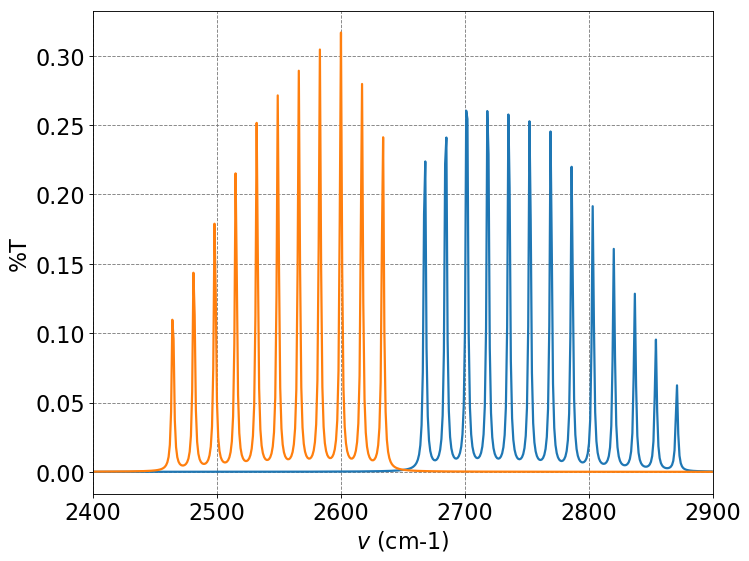

In [47]:
import numpy as np
from scipy.constants import h,hbar,c
import matplotlib.pyplot as plt

#HBr
def vtil(k,u):
    from scipy.constants import h,hbar,c
    return (((k/u)**0.5)/(2*np.pi*c)) #units of c = m/sec

k = 412 # units of N/m

u = ((79.904*1.0078)/(79.904+1.0078))
print("reduced mass of HBr (amu):",u)
u = u*(1.66053904e-27)#units of Kg
print("reduced mass of HBr (Kg):",u) # units of inverse meters

vtil_HBr = vtil(k,u)/100 #units of wavenumbers
print(vtil_HBr)

def Btil(u,Re):
    from scipy.constants import h,hbar,c
    return h/(8*(np.pi**2)*c*u*(Re**2))

Re = 141.44e-12 #units of meters

Btil_HBr = Btil(u,Re)/100 #units of wavenumbers
print(Btil_HBr)
    

v0 = vtil_HBr +2*Btil_HBr*(1)
v1 = vtil_HBr +2*Btil_HBr*(1+1)
v2 = vtil_HBr +2*Btil_HBr*(2+1)
v3 = vtil_HBr +2*Btil_HBr*(3+1)
v4 = vtil_HBr +2*Btil_HBr*(4+1)
v5 = vtil_HBr +2*Btil_HBr*(5+1)
v6 = vtil_HBr +2*Btil_HBr*(6+1)
v7 = vtil_HBr +2*Btil_HBr*(7+1)
v8 = vtil_HBr +2*Btil_HBr*(8+1)
v9 = vtil_HBr +2*Btil_HBr*(9+1)
v10 = vtil_HBr +2*Btil_HBr*(10+1)
v11 = vtil_HBr +2*Btil_HBr*(11+1)
v12 = vtil_HBr +2*Btil_HBr*(12+1)
v = [v12,v11,v10,v9,v8,v7,v6,v5,v4,v3,v2,v1,v0]
print(v0)
print(v)

#P Branch

p1 = vtil_HBr -2*Btil_HBr*(1)
p2 = vtil_HBr -2*Btil_HBr*(2)
p3 = vtil_HBr -2*Btil_HBr*(3)
p4 = vtil_HBr -2*Btil_HBr*(4)
p5 = vtil_HBr -2*Btil_HBr*(5)
p6 = vtil_HBr -2*Btil_HBr*(6)
p7 = vtil_HBr -2*Btil_HBr*(7)
p8 = vtil_HBr -2*Btil_HBr*(8)
p9 = vtil_HBr -2*Btil_HBr*(9)
p10 = vtil_HBr -2*Btil_HBr*(10)
p11 = vtil_HBr -2*Btil_HBr*(11)

p = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]
print(p1)
print(p)

def lorentzian(x,v,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-v)**2 + (0.5*fwhm)**2 )

x = np.arange(2400,2900,1)
fwhm = 2.0

ax = define_figure(xlabel="$v$ (cm-1)",ylabel="%T")
#ax.plot(v,transmit,lw=2)
#ax.legend(fontsize=20)
plt.plot(x,0.2*lorentzian(x,v12,fwhm)+0.3*lorentzian(x,v11,fwhm)+0.4*lorentzian(x,v10,fwhm)+0.5*lorentzian(x,v9,fwhm)+0.6*lorentzian(x,v8,fwhm)+0.7*lorentzian(x,v7,fwhm)+0.8*lorentzian(x,v6,fwhm)+0.85*lorentzian(x,v5,fwhm)+0.90*lorentzian(x,v4,fwhm)+0.95*lorentzian(x,v3,fwhm)+1*lorentzian(x,v2,fwhm)+0.9*lorentzian(x,v1,fwhm)+0.8*lorentzian(x,v0,fwhm),lw=2)
plt.plot(x,0.8*lorentzian(x,p1,fwhm)+0.9*lorentzian(x,p2,fwhm)+1*lorentzian(x,p3,fwhm)+0.95*lorentzian(x,p4,fwhm)+0.9*lorentzian(x,p5,fwhm)+0.85*lorentzian(x,p6,fwhm)+0.80*lorentzian(x,p7,fwhm)+0.7*lorentzian(x,p8,fwhm)+0.6*lorentzian(x,p9,fwhm)+0.5*lorentzian(x,p10,fwhm)+0.4*lorentzian(x,p11,fwhm),lw=2)
plt.xlim(2400,2900)

# Practice

***In the above spectrum for HBr, I haven't corrected for the vibration-rotation interaction, nor have I corrected for the nonrigid HBr bond. Use a for loop (or series of for loops) to replot the P and R branches while accounting for these corrections.***

For HBr:

$\tilde{B_e} = 8.4649 cm^{-1}$

$\tilde{\alpha_e} = 0.1689 cm^{-1}$

$\tilde{D_e} = 3.458x10^{-4} cm^{-1}$

## Spectral Broadening

Any quantum mechanical description of vibrations will result in a set of transitions at specific frequencies. However, in experimental spectra, the individual transitions can sometimes be hard to distinguish (particularly for polyatomic molecules) because experimental spectra have many broad features. Broadening is categorized as either homogenous or inhomogenous.

### Homogeneous Broadening

Effects that equally broaden the observed transitions of quantum absorbers (or emitters) in a system are termed homogenous.  These include the natural line width (i.e. uncertainty principle) and collisional effects.  These effects can be accurately represented by a Lorentzian line shape.  

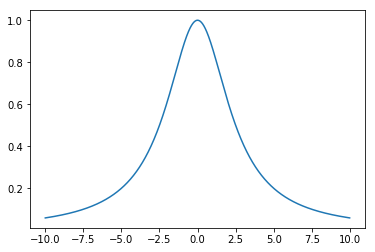

In [31]:
fwhm = 5
lorentz_constant = fwhm**2/4.0
x0 = 0.0
x=np.arange(-10,10,0.01)
lorentz = lorentz_constant / ( (x-x0)**2 + (0.25*fwhm**2))
plt.plot(x,lorentz)

### Inhomogeneous Broadening

Phenomena that effect different oscillators within a system uniquely lead to inhomogenous broadening.  Among other things, one example is solvent effects.  These can be represented using a Gaussian.

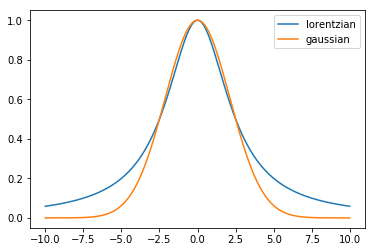

In [36]:
fwhm = 5
lorentz_constant = fwhm**2/4.0
fwhm_constants = 4.0*np.log(2.0)/(fwhm**2)
x0 = 0.0
x=np.arange(-10,10,0.01)
lorentz = lorentz_constant / ( (x-x0)**2 + (0.25*fwhm**2))
gaussian = np.exp(-fwhm_constants*(x-x0)**2)
plt.plot(x,lorentz,label="lorentzian")
plt.plot(x,gaussian,label="gaussian")
plt.legend()